In [1]:
import cmipaccess as cmip
import numpy as np
import lenapy
import xarray as xr

In [2]:
from dask.distributed import Client
client = Client(n_workers=10)

INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at:     tcp://127.0.0.1:34025
INFO:distributed.scheduler:  dashboard at:  http://127.0.0.1:8787/status
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:39011'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:43543'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:45781'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:39145'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:33557'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:37419'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:32805'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:40711'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:44119'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:41671'
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:35667', name: 3, status: init, memor

In [3]:
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 10
Total threads: 40,Total memory: 96.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:34025,Workers: 10
Dashboard: http://127.0.0.1:8787/status,Total threads: 40
Started: Just now,Total memory: 96.00 GiB
Comm: tcp://127.0.0.1:33179,Total threads: 4
Dashboard: http://127.0.0.1:41255/status,Memory: 9.60 GiB
Nanny: tcp://127.0.0.1:39011,


In [4]:
ds = cmip.spiritx.download_multi_variables_timeseries('CESM2', 'historical','tas','rsut','rsdt','rlut', chunks = dict(time=60),
                                             overwrite=True)

/home/rguillaume/virtual_envs/phd/lib/python3.10/site-packages/gribapi/__init__.py:23: UserWarning: ecCodes 2.31.0 or higher is recommended. You are running version 2.16.0
  warnings.warn(
INFO:distributed.scheduler:Receive client connection: Client-worker-c0438dc7-354a-11ef-a8f4-f40270b8ae38
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:42896
INFO:distributed.scheduler:Receive client connection: Client-worker-c0682c8c-354a-11ef-a900-f40270b8ae38
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:42908
INFO:distributed.scheduler:Receive client connection: Client-worker-c06c43bf-354a-11ef-a8f2-f40270b8ae38
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:42912
INFO:distributed.scheduler:Receive client connection: Client-worker-c06c707e-354a-11ef-a905-f40270b8ae38
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:42914
INFO:distributed.scheduler:Receive client connection: Client-worker-c0716a8

    --> File saved: tas_Amon_CESM2_historical_r1i1p1f1_gn_1850_2014.nc
    --> File saved: rsut_Amon_CESM2_historical_r1i1p1f1_gn_1850_2014.nc


In [4]:
data_experiment = ds

In [58]:
year_start, year_end = data_experiment.time.dt.year.values[[0,-1]]

In [60]:
year_end

2014

In [43]:
model = 'CESM2'
experiment = 'historical'
import glob
variable='tas'

In [57]:
GLOBAL_MEAN_DATA_DIR = '/projets/EMC2/data'
generation='CMIP6'
realisation='r1i1p1f1'
path_out = f"{GLOBAL_MEAN_DATA_DIR}/Models/{generation}/{model}/{experiment}/{realisation}"
import os
print(os.path.exists(path_out))
os.listdir(path_out)

True


['rlut-depiC_Amon_CESM2_historical_r1i1p1f1_gn_1850-2014.nc',
 'rsdt-depiC_Amon_CESM2_historical_r1i1p1f1_gn_1850-2014.nc',
 'pr_Amon_CESM2_historical_r1i1p1f1_gn_1850-2014.nc',
 'pr-depiC_Amon_CESM2_historical_r1i1p1f1_gn_1850-2014.nc',
 'rsds-depiC_Amon_CESM2_historical_r1i1p1f1_gn_1850-2014.nc',
 'hfls_Amon_CESM2_historical_r1i1p1f1_gn_1850-2014.nc',
 'evspsbl_Amon_CESM2_historical_r1i1p1f1_gn_1850-2014.nc',
 'hfls-depiC_Amon_CESM2_historical_r1i1p1f1_gn_1850-2014.nc',
 'rsus-depiC_Amon_CESM2_historical_r1i1p1f1_gn_1850-2014.nc',
 'rsus_Amon_CESM2_historical_r1i1p1f1_gn_1850-2014.nc',
 'evspsbl-depiC_Amon_CESM2_historical_r1i1p1f1_gn_1850-2014.nc',
 'tas_Amon_CESM2_historical_r1i1p1f1_gn_1850-2014.nc',
 'rlds_Amon_CESM2_historical_r1i1p1f1_gn_1850-2014.nc',
 'rsut_Amon_CESM2_historical_r1i1p1f1_gn_1850-2014.nc',
 'rsut-depiC_Amon_CESM2_historical_r1i1p1f1_gn_1850-2014.nc',
 'rlus_Amon_CESM2_historical_r1i1p1f1_gn_1850-2014.nc',
 'hfss-depiC_Amon_CESM2_historical_r1i1p1f1_gn_1850-201

In [47]:
grid_label = data_experiment.grid_label
table_id = data_experiment.table_id
if table_id=='Amon':
    table_grid = 'fx'
    area_var = 'areacella'
elif table_id=='Omon':
    table_grid='Ofx'
    area_var = 'areacello'
path_list_to_area = glob.glob(f"/bdd/CMIP6/CMIP/*/{model}/{experiment}/*/{table_grid}/{area_var}/{grid_label}/latest/*")
if len(path_list_to_area) == 0:
    path_list_to_area = glob.glob(f"/bdd/CMIP6/CMIP/*/{model}/piControl/*/{table_grid}/{area_var}/{grid_label}/latest/*")
    if len(path_list_to_area) == 0:
        path_list_to_area = glob.glob(f"/bdd/CMIP6/CMIP/*/{model}/*/*/{table_grid}/{area_var}/{grid_label}/latest/*")
        if len(path_list_to_area) == 0:
            path_list_to_area = glob.glob(f"/bdd/CMIP6/*/*/{model}/*/*/{table_grid}/{area_var}/{grid_label}/latest/*")
area_path = path_list_to_area[0]
area = xr.open_dataset(area_path)[area_var].fillna(0)
averaging_dims = area.dims
data_global_mean = data_experiment[[variable]].weighted(area).mean(averaging_dims, keep_attrs=True)
data_global_mean

<xarray.Dataset> Size: 24kB
Dimensions:  (time: 1980)
Coordinates:
  * time     (time) object 16kB 1850-01-15 12:00:00 ... 2014-12-15 12:00:00
Data variables:
    tas      (time) float32 8kB dask.array<chunksize=(1980,), meta=np.ndarray>
Attributes: (12/46)
    Conventions:                     CF-1.7 CMIP-6.2
    activity_id:                     CMIP
    case_id:                         15
    cesm_casename:                   b.e21.BHIST.f09_g17.CMIP6-historical.001
    contact:                         cesm_cmip6@ucar.edu
    creation_date:                   2019-01-16T23:34:05Z
    ...                              ...
    sub_experiment_id:               none
    branch_time_in_parent:           219000.0
    branch_time_in_child:            674885.0
    branch_method:                   standard
    further_info_url:                https://furtherinfo.es-doc.org/CMIP6.NCA...
    DODS_EXTRA.Unlimited_Dimension:  time

In [6]:
ds = cmip.spiritx.get_all_detrended_global_time_series_multivariable('IPSL-CM6A-LR','historical',
                                                            'tas','rlut','rsut','rsdt', 
                                                            progress = False, add_control_mean=True,)

In [7]:
ds

<xarray.Dataset> Size: 2MB
Dimensions:            (realisation: 33, time: 1980)
Coordinates:
  * time               (time) datetime64[ns] 16kB 1850-01-01 ... 2014-12-01
    height             float64 8B 2.0
  * realisation        (realisation) <U9 1kB 'r11i1p1f1' ... 'r7i1p1f1'
Data variables:
    tas                (realisation, time) float64 523kB -2.28 ... 0.01697
    tas_control_mean   (realisation) float64 264B 286.0 285.9 ... 286.0 285.9
    rlut               (realisation, time) float64 523kB -2.974 -2.302 ... -1.87
    rlut_control_mean  (realisation) float64 264B 238.1 237.8 ... 238.1 238.0
    rsut               (realisation, time) float64 523kB 4.648 2.883 ... 7.282
    rsut_control_mean  (realisation) float64 264B 102.9 103.0 ... 102.9 103.0
    rsdt               (realisation, time) float64 523kB 11.24 8.372 ... 11.06
    rsdt_control_mean  (realisation) float64 264B 341.7 341.7 ... 341.7 341.7
Attributes: (12/50)
    name:                   /ccc/work/cont003/gencmip6/p86maf/IGCM_OUT/IPSLCM...
    Conventions:            CF-1.7 CMIP-6.2
    creation_date:          2018-06-18T08:06:47Z
    tracking_id:            hdl:21.14100/bcf36683-4a0b-4e12-a027-b12dbe886e73
    description:            CMIP6 historical
    title:                  IPSL-CM6A-LR model output prepared for CMIP6 / CM...
    ...                     ...
    EXPID:                  historical
    CMIP6_CV_version:       cv=6.2.3.5-2-g63b123e
    dr2xml_md5sum:          d6225e658d7de0912fca2a4293dbe2a7
    model_version:          6.1.4
    history:                Mon Sep  3 18:11:11 2018: ncatted -O -a parent_va...
    parent_variant_label:   r1i1p1f1

In [14]:
import pandas as pd
pd.date_range('6000-01-15', freq='MS', periods=1000, unit='s')

DatetimeIndex(['6000-02-01', '6000-03-01', '6000-04-01', '6000-05-01',
               '6000-06-01', '6000-07-01', '6000-08-01', '6000-09-01',
               '6000-10-01', '6000-11-01',
               ...
               '6082-08-01', '6082-09-01', '6082-10-01', '6082-11-01',
               '6082-12-01', '6083-01-01', '6083-02-01', '6083-03-01',
               '6083-04-01', '6083-05-01'],
              dtype='datetime64[s]', length=1000, freq='MS')

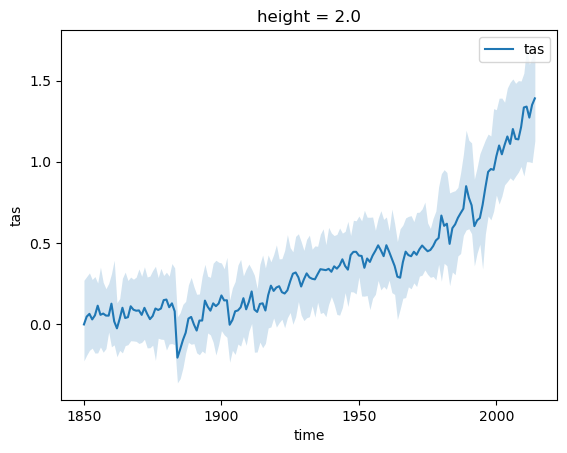

In [4]:
ds.tas.resample(time='YS').mean().lntime.plot()

In [ ]:
# ds.control_extract.plot()
# ds.control_drift.plot()
ds.detrended_data.lntime.climato().plot()


In [ ]:
cmip.get_CMIP6_data('CESM2','amip-p4K', 'r1i1p1f1', 'rsdt', chunks = dict(time=10))

In [ ]:
cmip.esgf.find_models_experiment('hist-volc')

In [ ]:
cmip.get_path_CMIP6_data_esgf('CanESM5', 'piClim-histall','r1i1p2f1', 'tas')

In [ ]:
from pyesgf.search import SearchConnection
conn = SearchConnection('https://esgf-data.dkrz.de/esg-search', distrib=True)

In [ ]:
ctx = conn.new_context(
    project='CMIP5',
    experiment='piControl',
    model='CCSM4',
    # ensemble='r1i1p1',
    time_frequency='mon',
    facets='model',
    data_node='esgf2.dkrz.de',
    )
ctx.hit_count
result = ctx.search()[0]
variable='tos'
# result = [k for k in ctx.search() if f".{variable}." in k ]
result.dataset_id
files = result.file_context().search()
for file in files:
    if 'tasmax' in file.opendap_url:
        tasmax_url = file.opendap_url
        print(tasmax_url)

In [ ]:
files = ctx.search()[1].file_context().search()

In [ ]:
for file in files:
    print(file.opendap_url)